<img src="https://github.com/FTDS-assignment-bay/FTDS-007-HCK-group-002/blob/main/assets/ChurnGuardian-Logo-Transparants.png?raw=true" width="500" height="100">


Project by : [Edy Setiawan](https://www.linkedin.com/in/edysetiawan/), [Irfansyah Alif Muhammad](https://www.linkedin.com/in/irfansyahalifmuhammad/), [Sagara Biru](https://www.linkedin.com/in/sagara-biru/), [Yosef Feriyanto](https://www.linkedin.com/in/yosef-feriyanto-522754175/)

# i. Introduction

**Dataset Overview:**

- Dataset Source: This dataset is obtained from the Kaggle public dataset (https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics/data)
- This dataset contains information about customers in the telecommunications industry, focusing on various attributes that could be indicative of customer churn

1. **CustomerID**: A unique ID that identifies each customer
2. **Gender**: The customer's gender: Male, Female
3. **Age**: The customer's current age, in years
4. **Married**: Indicates if the customer is married: Yes, No
5. **Number of Dependents**: Indicates the number of dependents that live with the customer
6. **City**: The city of the customer's primary residence
7. **Zip Code**: The zip code of the customer's primary residence
8. **Latitude**: The latitude of the customer's primary residence
9. **Longitude**: The longitude of the customer's primary residence
10. **Number of Referrals**: Indicates the number of times the customer has referred someone else
11. **Tenure in Months**: Indicates the total amount of months that the customer has been with the company
12. **Offer**: Identifies the last marketing offer that the customer received
13. **Phone Service**: Indicates if the customer subscribes to home phone service
14. **Avg Monthly Long Distance Charges**: Indicates the customer's average long distance charges per month
15. **Multiple Lines**: Indicates if the customer subscribes to multiple lines
16. **Internet Service**: Indicates if the customer subscribes to Internet service
17. **Internet Type**: Indicates the customer's type of internet connection
18. **Avg Monthly GB Download**: Indicates the customer's average download volume in GB
19. **Online Security**: Indicates if the customer subscribes to an additional online security service
20. **Online Backup**: Indicates if the customer subscribes to an additional online backup service
21. **Device Protection Plan**: Indicates if the customer subscribes to a device protection plan
22. **Premium Tech Support**: Indicates if the customer subscribes to premium technical support services
23. **Streaming TV**: Indicates if the customer uses their Internet service to stream TV
24. **Streaming Movies**: Indicates if the customer uses their Internet service to stream movies
25. **Streaming Music**: Indicates if the customer uses their Internet service to stream music
26. **Unlimited Data**: Indicates if the customer has paid an additional charge for unlimited data
27. **Contract**: Indicates the customer's current contract type
28. **Paperless Billing**: Indicates if the customer has chosen paperless billing
29. **Payment Method**: Indicates how the customer pays their bill
30. **Monthly Charge**: Indicates the customer's current total monthly charge
31. **Total Charges**: Indicates the customer's total charges to date
32. **Total Refunds**: Indicates the customer's total refunds to date
33. **Total Extra Data Charges**: Indicates the customer's total charges for extra data
34. **Total Long Distance Charges**: Indicates the customer's total charges for long-distance services
35. **Total Revenue**: Indicates the company's total revenue from this customer
36. **Customer Status**: Indicates the status of the customer at the end of the quarter
37. **Churn Category**: A high-level category for the customer's reason for leaving
38. **Churn Reason**: A customer's specific reason for leaving



**Background:**

The telecommunications industry is highly competitive, and customer churn is a significant concern. Retaining existing customers is often more cost-effective than acquiring new ones. Therefore, predicting customer churn and understanding the underlying reasons can provide invaluable insights for customer retention strategies.


**Problem Statement:**

To develop a machine learning model that predicts customer churn in the telecommunications industry with at least 80% recall score, and to segment the identified "at-risk" customers into clusters for targeted retention strategies.

**Objectives:**

- Data Preparation and Exploration: To clean and explore the dataset to understand the variables that influence customer churn.
- Predictive Modeling: To develop a classification model that can predict customer churn with an recall score at least 80%.
- Clustering Analysis: To segment the customers predicted as 'Churn' into different clusters based on their characteristics.
- Retention Strategy: To propose targeted retention strategies for each identified cluster.
- Evaluation: To evaluate the effectiveness of the model and the proposed retention strategies within a set timeframe (e.g., 3 months).

**SMART Goals:**

- Specific: To reduce the churn rate by at least 30% within the next quarter.
- Measurable: To achieve a classification model recall score of 80% and to track the retention rate post-implementation.
- Achievable: Utilize machine learning algorithms and clustering techniques that have been proven effective in similar scenarios.
- Relevant: The project aims to directly impact customer retention, thereby increasing revenue and reducing acquisition costs.
- Time-Bound: Complete the model development by 1 week and evaluate its effectiveness within the next quarter.

# ii. Import Libraries

In [1]:
# Import Pandas module for data manipulation
import pandas as pd

# Import NumPy module for math operations
import numpy as np

# Import Seaborn module for data visualization
import seaborn as sns

# Import Matplotlib module to create graphs
import matplotlib.pyplot as plt

# Import StandardScaler module for feature scaling
from sklearn.preprocessing import LabelEncoder

# Import Chi-square test of independence
from scipy.stats import chi2_contingency

# Import module to ignore warnings
import warnings

# Turn off alerts
warnings.filterwarnings('ignore') # Turn off warnings

# iii. Data Loading

In [2]:
dataset = pd.read_csv(r'https://raw.githubusercontent.com/FTDS-assignment-bay/FTDS-007-HCK-group-002/main/dataset/telecom_customer_churn.csv')

df = dataset.copy() 
# copy original dataframe to new dataframe

In [3]:
# Display the first 10 rows
df.head(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN
8,0015-UOCOJ,Female,68,No,0,Simi Valley,93063,34.296813,-118.685703,0,...,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NaN,NaN
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,...,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NaN,NaN


# iv. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [5]:
# Change columns' name to lowercase and replace whitespace with "_"

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'city', 'zip_code', 'latitude', 'longitude', 'number_of_referrals',
       'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'customer_status', 'churn_category', 'churn_reason'],
      dtype='object')

In [6]:
# check duplicate rows in the dataset

print('Number of duplicate rows:', df.duplicated().sum())

Number of duplicate rows: 0


In [7]:
# checking missing value

missing_values_per_column = df.isna().sum()
missing_columns = missing_values_per_column[missing_values_per_column > 0]

if missing_columns.empty:
    print("No missing value")
else:
    print("Columns with missing values: ")
    print(missing_columns)

Columns with missing values: 
avg_monthly_long_distance_charges     682
multiple_lines                        682
internet_type                        1526
avg_monthly_gb_download              1526
online_security                      1526
online_backup                        1526
device_protection_plan               1526
premium_tech_support                 1526
streaming_tv                         1526
streaming_movies                     1526
streaming_music                      1526
unlimited_data                       1526
churn_category                       5174
churn_reason                         5174
dtype: int64


#### **Input Missing Value**

In [8]:
# Replace NaN with 0.0

df['avg_monthly_gb_download'] = df['avg_monthly_gb_download'].replace(np.nan,0.0)

df['avg_monthly_long_distance_charges'] = df['avg_monthly_long_distance_charges'].replace(np.nan,0.0)

The variables related to internet services (such as Internet Type, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming, Unlimited Data) all have an identical count of NaN values. According to their definitions, these aren't actually missing data; instead, they signify that the customer doesn't have a subscription to the internet service.

In [9]:
# replace NaN  value with "No Internet"

df[['internet_type', 'online_security', 'online_backup', 'device_protection_plan', 
           'premium_tech_support', 'streaming_tv', 'streaming_movies','streaming_music','unlimited_data']] = df[['internet_type', 'online_security', 'online_backup', 'device_protection_plan', 
           'premium_tech_support', 'streaming_tv', 'streaming_movies','streaming_music','unlimited_data']].replace(np.nan,'No Internet')

NaN values associated to the variable 'Multiple Lines' are due to the fact that the customer is not subscribed to home phone service

In [10]:
# replace NaN value with "No Phone Service"

df['multiple_lines'] = df['multiple_lines'].replace(np.nan,'No Phone Pervice')

Dropping the "customer id" column, as it is unique for every customer and doesn't offer any valuable insights for analyzing or forecasting customer behavior or attrition.

In [11]:
df = df.drop(['customer_id'],axis=1)

Zip Codes don't have a mathematical meaning in the way integers do, changing the data type of Zip Codes from integers to objects (or strings)

In [12]:
df['zip_code']=df['zip_code'].astype('object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             7043 non-null   object 
 1   age                                7043 non-null   int64  
 2   married                            7043 non-null   object 
 3   number_of_dependents               7043 non-null   int64  
 4   city                               7043 non-null   object 
 5   zip_code                           7043 non-null   object 
 6   latitude                           7043 non-null   float64
 7   longitude                          7043 non-null   float64
 8   number_of_referrals                7043 non-null   int64  
 9   tenure_in_months                   7043 non-null   int64  
 10  offer                              7043 non-null   object 
 11  phone_service                      7043 non-null   objec

In [14]:
df_clean = df.copy()

# v. EDA (Exploratory Data Analysis)

In [15]:
df.describe()

,age,number_of_dependents,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,36.197455,-119.756684,1.951867,32.386767,22.958954,20.515405,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,2.468929,2.154425,3.001199,24.542061,15.448113,20.418940,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,32.555828,-124.301372,0.000000,1.000000,0.000000,0.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,33.990646,-121.788090,0.000000,9.000000,9.210000,3.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,36.205465,-119.595293,0.000000,29.000000,22.890000,17.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,38.161321,-117.969795,3.000000,55.000000,36.395000,27.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


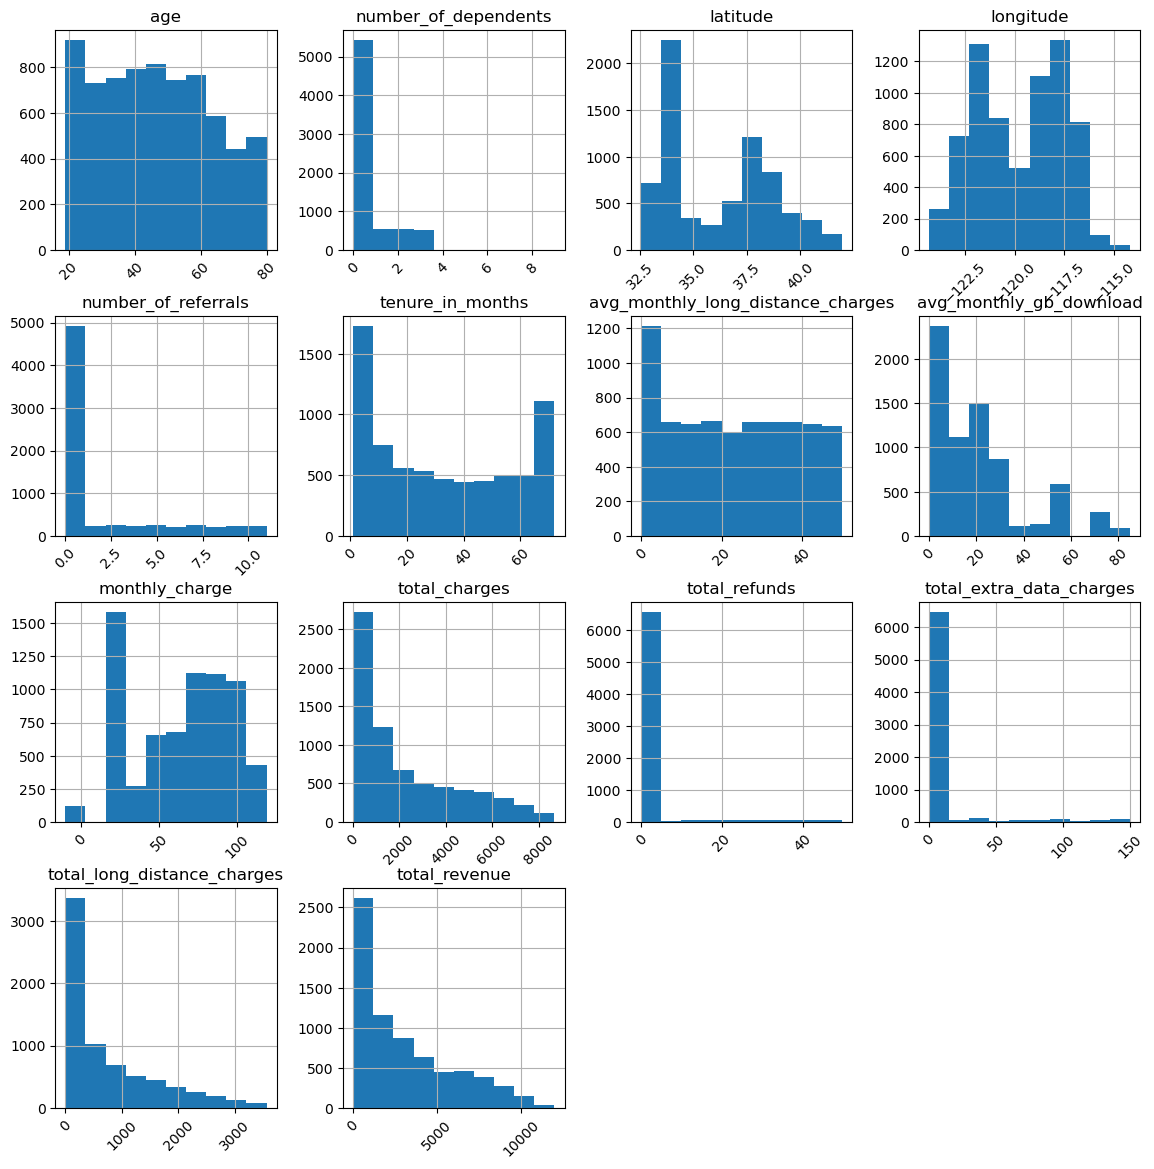

In [16]:
# check distribution of dataset for numerical columns

df.hist(figsize=(14,14), xrot=45);

Correlation Matrix Heatmap:


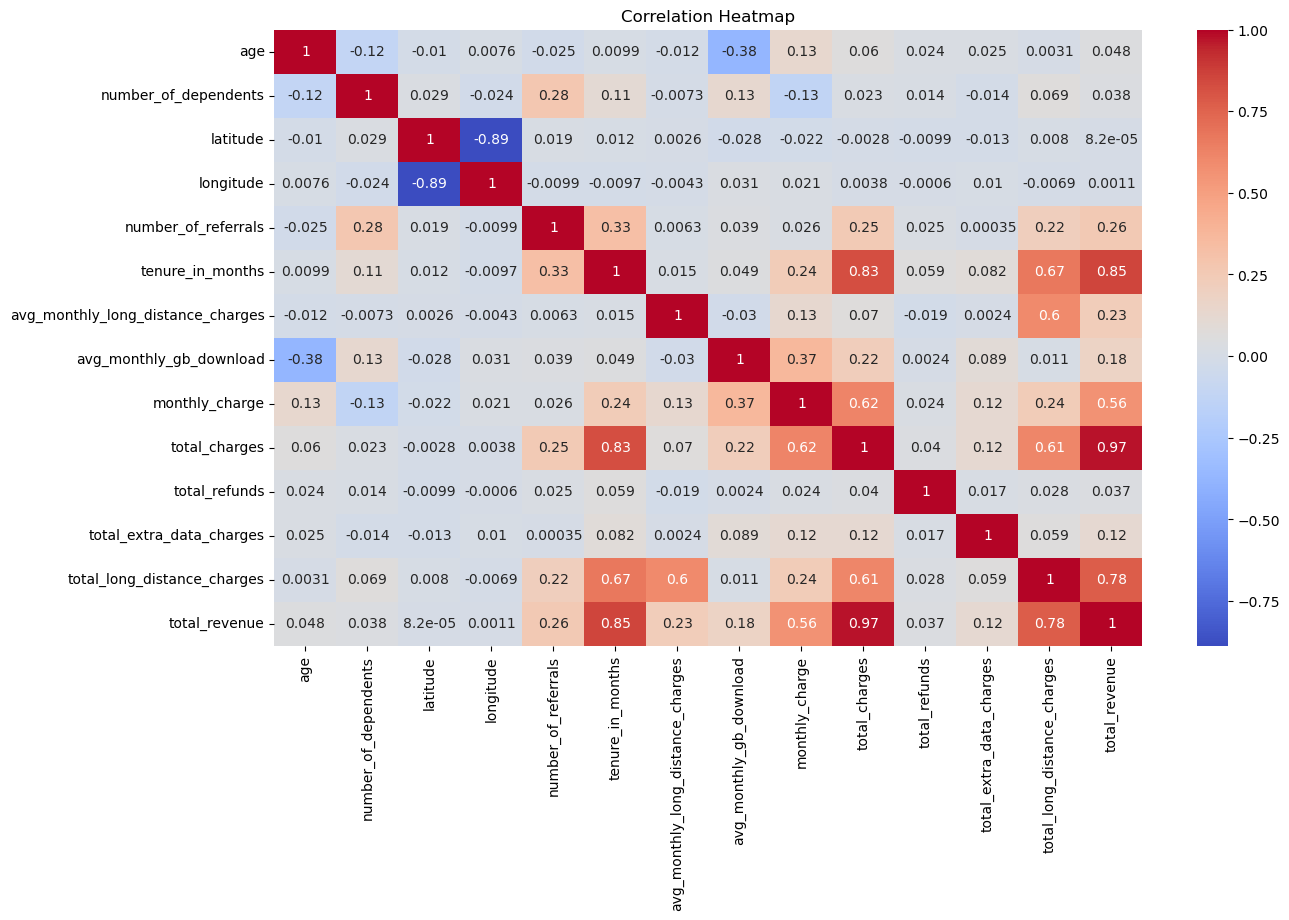

In [17]:
correlation_matrix = df.corr()
print("Correlation Matrix Heatmap:")

# Heatmap of the correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [18]:
correlation_matrix

,age,number_of_dependents,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
age,1.000000,-0.119000,-0.010305,0.007612,-0.025141,0.009927,-0.011749,-0.376595,0.134511,0.059684,0.024168,0.025036,0.003065,0.048265
number_of_dependents,-0.119000,1.000000,0.029081,-0.024271,0.278003,0.108237,-0.007324,0.129966,-0.125649,0.022535,0.014023,-0.014436,0.068966,0.038038
latitude,-0.010305,0.029081,1.000000,-0.885979,0.018715,0.011963,0.002631,-0.027676,-0.021613,-0.002784,-0.009901,-0.013233,0.008029,0.000082
longitude,0.007612,-0.024271,-0.885979,1.000000,-0.009893,-0.009672,-0.004341,0.030979,0.021052,0.003811,-0.000597,0.010461,-0.006923,0.001062
number_of_referrals,-0.025141,0.278003,0.018715,-0.009893,1.000000,0.326975,0.006336,0.038575,0.026301,0.250378,0.024756,0.000350,0.216190,0.261853
tenure_in_months,0.009927,0.108237,0.011963,-0.009672,0.326975,1.000000,0.014596,0.049119,0.239065,0.826074,0.059021,0.082266,0.674149,0.853146
avg_monthly_long_distance_charges,-0.011749,-0.007324,0.002631,-0.004341,0.006336,0.014596,1.000000,-0.030455,0.130087,0.069500,-0.018644,0.002414,0.599828,0.232291
avg_monthly_gb_download,-0.376595,0.129966,-0.027676,0.030979,0.038575,0.049119,-0.030455,1.000000,0.372776,0.223268,0.002397,0.088939,0.011373,0.180726
monthly_charge,0.134511,-0.125649,-0.021613,0.021052,0.026301,0.239065,0.130087,0.372776,1.000000,0.622810,0.023963,0.121238,0.235685,0.563249
total_charges,0.059684,0.022535,-0.002784,0.003811,0.250378,0.826074,0.069500,0.223268,0.622810,1.000000,0.039558,0.121859,0.610185,0.972212


### Strong Correlations

1. **`total_charges` and `tenure_in_months`: 0.826**  
   A strong positive correlation. As the tenure in months increases, total charges also tend to increase.

2. **`total_revenue` and `total_charges`: 0.972**  
   A very strong positive correlation, almost nearing 1. This suggests that `total_revenue` and `total_charges` move in the same direction and are closely related. 

3. **`total_long_distance_charges` and `total_revenue`: 0.779**  
   Another strong positive correlation, indicating that long-distance charges contribute significantly to total revenue.

### Moderate Correlations

1. **`monthly_charge` and `avg_monthly_gb_download`: 0.373**  
   A moderate positive correlation suggests that higher monthly charges are associated with higher average monthly GB downloads.

2. **`monthly_charge` and `total_revenue`: 0.563**  
   Moderate positive correlation suggests that as monthly charges increase, total revenue also tends to increase but not as strongly as other variables.

3. **`number_of_referrals` and `tenure_in_months`: 0.327**  
   A moderate positive correlation indicates that longer-tenured customers are more likely to refer others.

### Negative Correlations

1. **`age` and `avg_monthly_gb_download`: -0.377**  
   A moderate negative correlation suggests that younger people tend to download more data.

### **Data Analysis**

1. Pie Chart for Customer Status Distribution

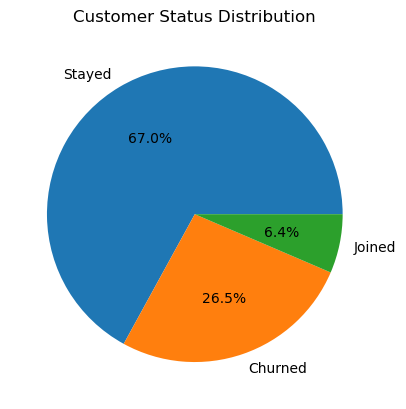

In [19]:
# Pie Chart for Customer Status Distribution
customer_status_count = df['customer_status'].value_counts()
plt.pie(customer_status_count, labels=customer_status_count.index, autopct='%1.1f%%')
plt.title('Customer Status Distribution')
plt.show()

The data frame indicates that 26.5% of customers have churned. 

The "Joined" Category row will be removed, as it doesn't offer any useful insights into the churn rate.

In [20]:
# Filter out 'Joined' from customer_status
filtered_df = df[df['customer_status'] != 'Joined']

3. Top Churned Cities

In [21]:
# check top 8 city with most Churned customers
top_churned_cities = df[df['customer_status'] == "Churned"].groupby('city').size().sort_values(ascending=False).head(8)

# Display the result
print(top_churned_cities)

city
San Diego        185
Los Angeles       78
San Francisco     31
San Jose          29
Fallbrook         26
Sacramento        26
Temecula          22
Escondido         16
dtype: int64


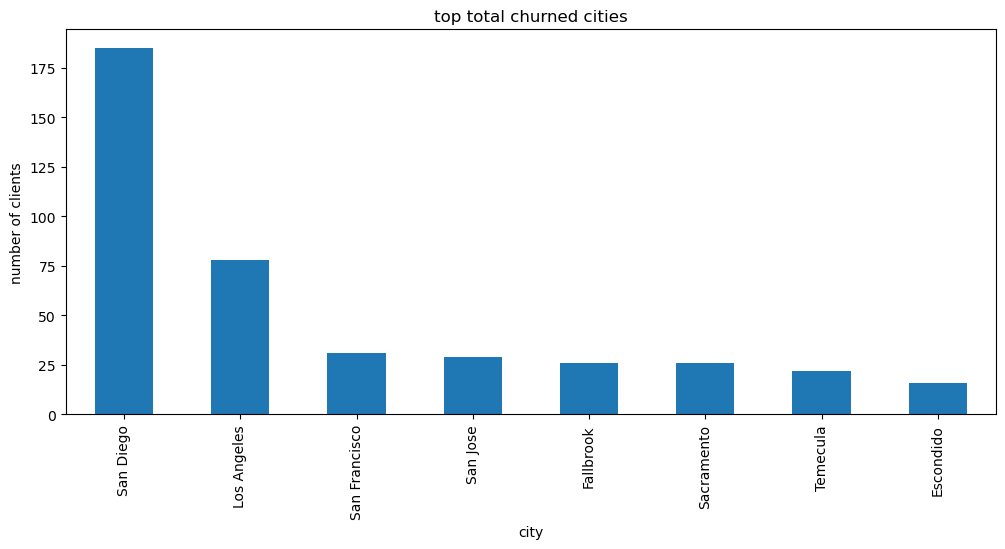

In [22]:
plt.rcParams["figure.figsize"] = (12,5)
def bars(bar_data,title,xlabel,ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return bar_data.plot(kind="bar")
bars(top_churned_cities,"top total churned cities", "cities" ,"number of clients")
plt.show()

The cities listed may require further investigation to understand why the churn rate is high. For example, you might want to look into customer service metrics, quality of service, or even competitive pricing in these specific locations.

4. Exploring Churn Reasons

In [23]:
df["churn_category"].value_counts()

Competitor         841
Dissatisfaction    321
Attitude           314
Price              211
Other              182
Name: churn_category, dtype: int64

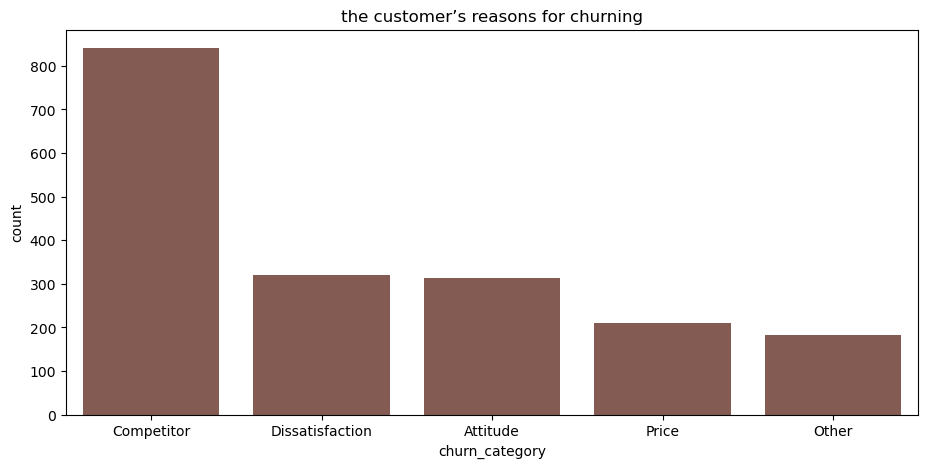

In [24]:
churned_df = df[df['customer_status'] == 'Churned']
plt.rcParams["figure.figsize"] = (11,5)
freq = df['churn_category'].value_counts() 
order = freq.index
base_color = sns.color_palette()[5]
sns.countplot(data = churned_df , x = churned_df["churn_category"], order = order,color= base_color)
plt.title("the customer’s reasons for churning");
plt.show()

The primary reason members are leaving is due to "competitor," which appears most frequently as the cause.

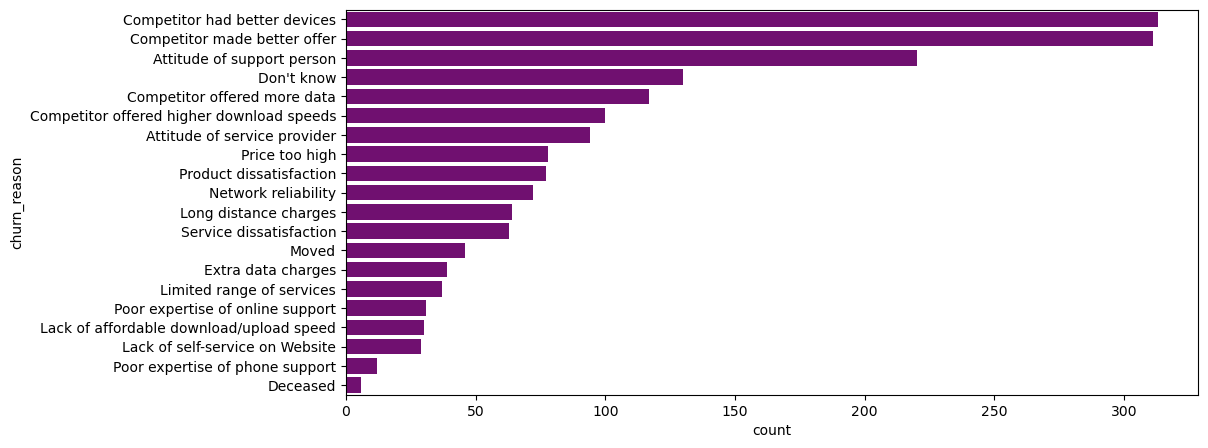

In [25]:
# check the spesific churn reason
sns.countplot(data=df,y="churn_reason",order = df["churn_reason"].value_counts().index,color = 'purple')
plt.show()

Upon exploring the reasons of customers for churning, it becomes apparent that "better devices from competitors," "better offers from competitors," and "Attitude of support person" are the most commonly cited factors.

Based on the two plots, we begin to get a clearer understanding of the reasons behind customer churn. The main contributing factors appear to be:

1. The competitor providing better offers and more advanced technology.
2. Poor attitude and service quality from this company.
3. High charges levied by this company.

5. Age distribution for Churned vs. Stayed

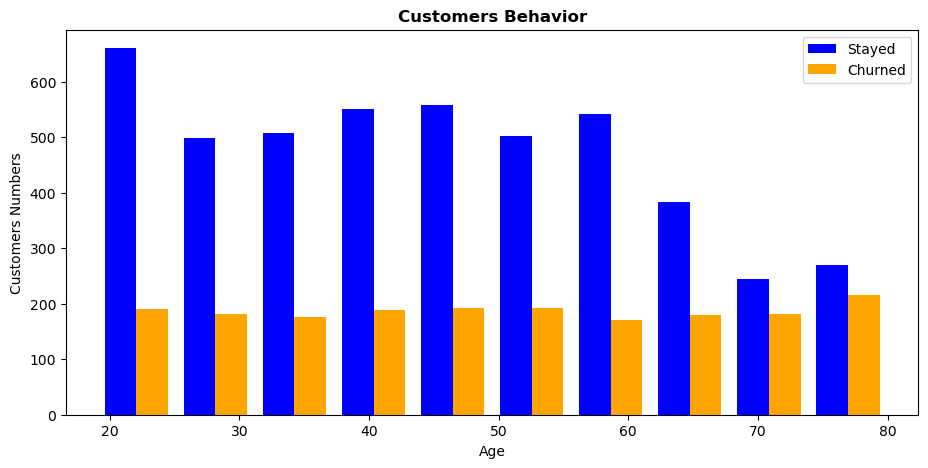

In [26]:
Customer_Stayed=df[df['customer_status']=='Stayed'].age
Customer_Churned=df[df['customer_status']=='Churned'].age

plt.xlabel('Age')
plt.ylabel('Customers Numbers')
plt.hist([Customer_Stayed,Customer_Churned], color=['blue','orange'],label=['Stayed','Churned'])

plt.title('Customers Behavior',fontweight ="bold")
plt.legend()
plt.show()

The histogram shows that age is not a significant factor in customer retention or churn. The "Stayed" group is slightly skewed towards younger ages, but not significantly. The "Churned" group is evenly distributed across all age ranges.

6. Gender distribution for Churned vs. Stayed

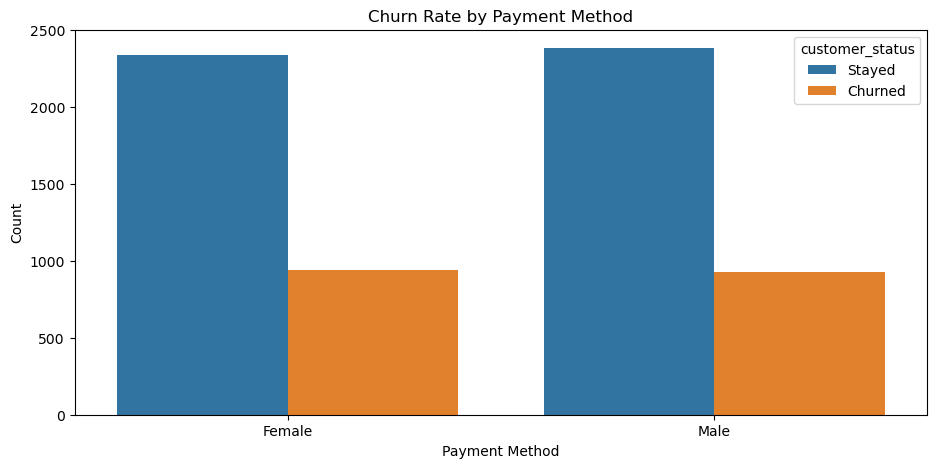

In [27]:
# Barchart for Churn Rate by Payment Method
sns.countplot(data=filtered_df, x='gender', hue='customer_status')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

The bar chart shows that the churn rate is fairly consistent across both genders. Neither gender appears to be a significant factor in influencing customer churn or retention.

8. Internet consumption based on Age Range

<Figure size 1600x1400 with 0 Axes>

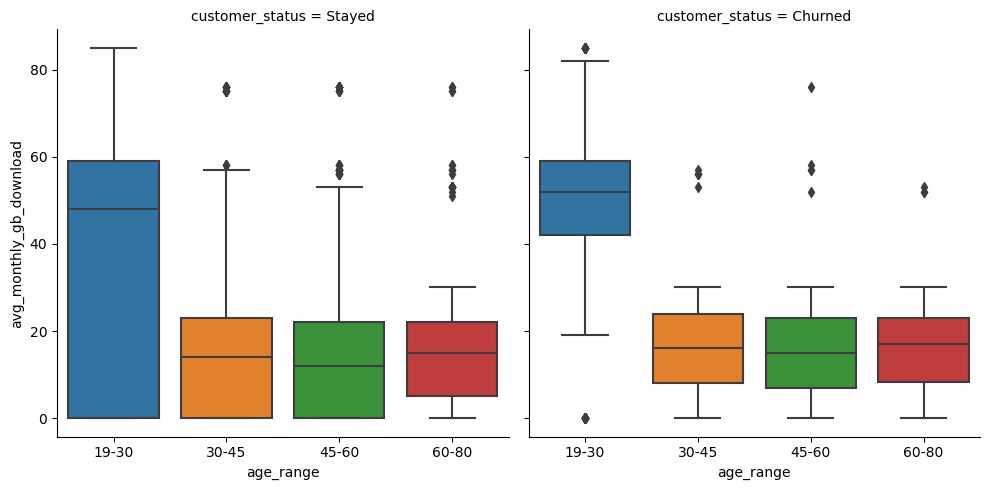

In [28]:
bins = [19,30,45,60,80]
names = ['19-30','30-45','45-60','60-80']
filtered_df['age_range'] = pd.cut(filtered_df['age'],bins, labels=names,include_lowest=True)

plt.figure(figsize=(16,14))
sns.catplot(data=filtered_df,x='age_range',y='avg_monthly_gb_download', col ='customer_status',kind='box')

As anticipated, younger individuals exhibit significantly higher download volumes compared to other age groups.

### **Analysis Between High Value Customers and Churn Customers**

#### **Analysis of High-Value Customers**

Customers who generate revenue above the company's average and continue to engage consistently with the services are considered to be high-value and loyal clients.

In [29]:
df['High Value'] = 0
df.loc[df['total_revenue'] > df['total_revenue'].mean(), 'High Value'] = 'High Value'

In [30]:
df_high_value = df[df['High Value'] == 'High Value']

In [31]:
df_high_value.head()

,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,...,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,High Value
6,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,71,...,109.70,7904.25,0.0,0,707.16,8611.41,Stayed,NaN,NaN,High Value
7,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,63,...,84.65,5377.80,0.0,20,816.48,6214.28,Stayed,NaN,NaN,High Value
9,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,65,...,90.45,5957.90,0.0,0,1849.90,7807.80,Stayed,NaN,NaN,High Value
11,Female,25,Yes,2,Sunnyvale,94086,37.378541,-122.020456,2,72,...,116.80,8456.75,0.0,0,1152.72,9609.47,Stayed,NaN,NaN,High Value
13,Female,32,No,0,La Mesa,91942,32.782501,-117.016110,0,72,...,101.30,7261.25,0.0,0,162.00,7423.25,Stayed,NaN,NaN,High Value


In [32]:
# Seperating the categorical and numerical columns
cat = [col for col in df.select_dtypes(include='object').columns if col not in ['city', 'zip_code', 'churn_category','churn_reason','High Value']]
num = [col for col in df.select_dtypes(exclude='object').columns if col not in ['latitude', 'longitude']]

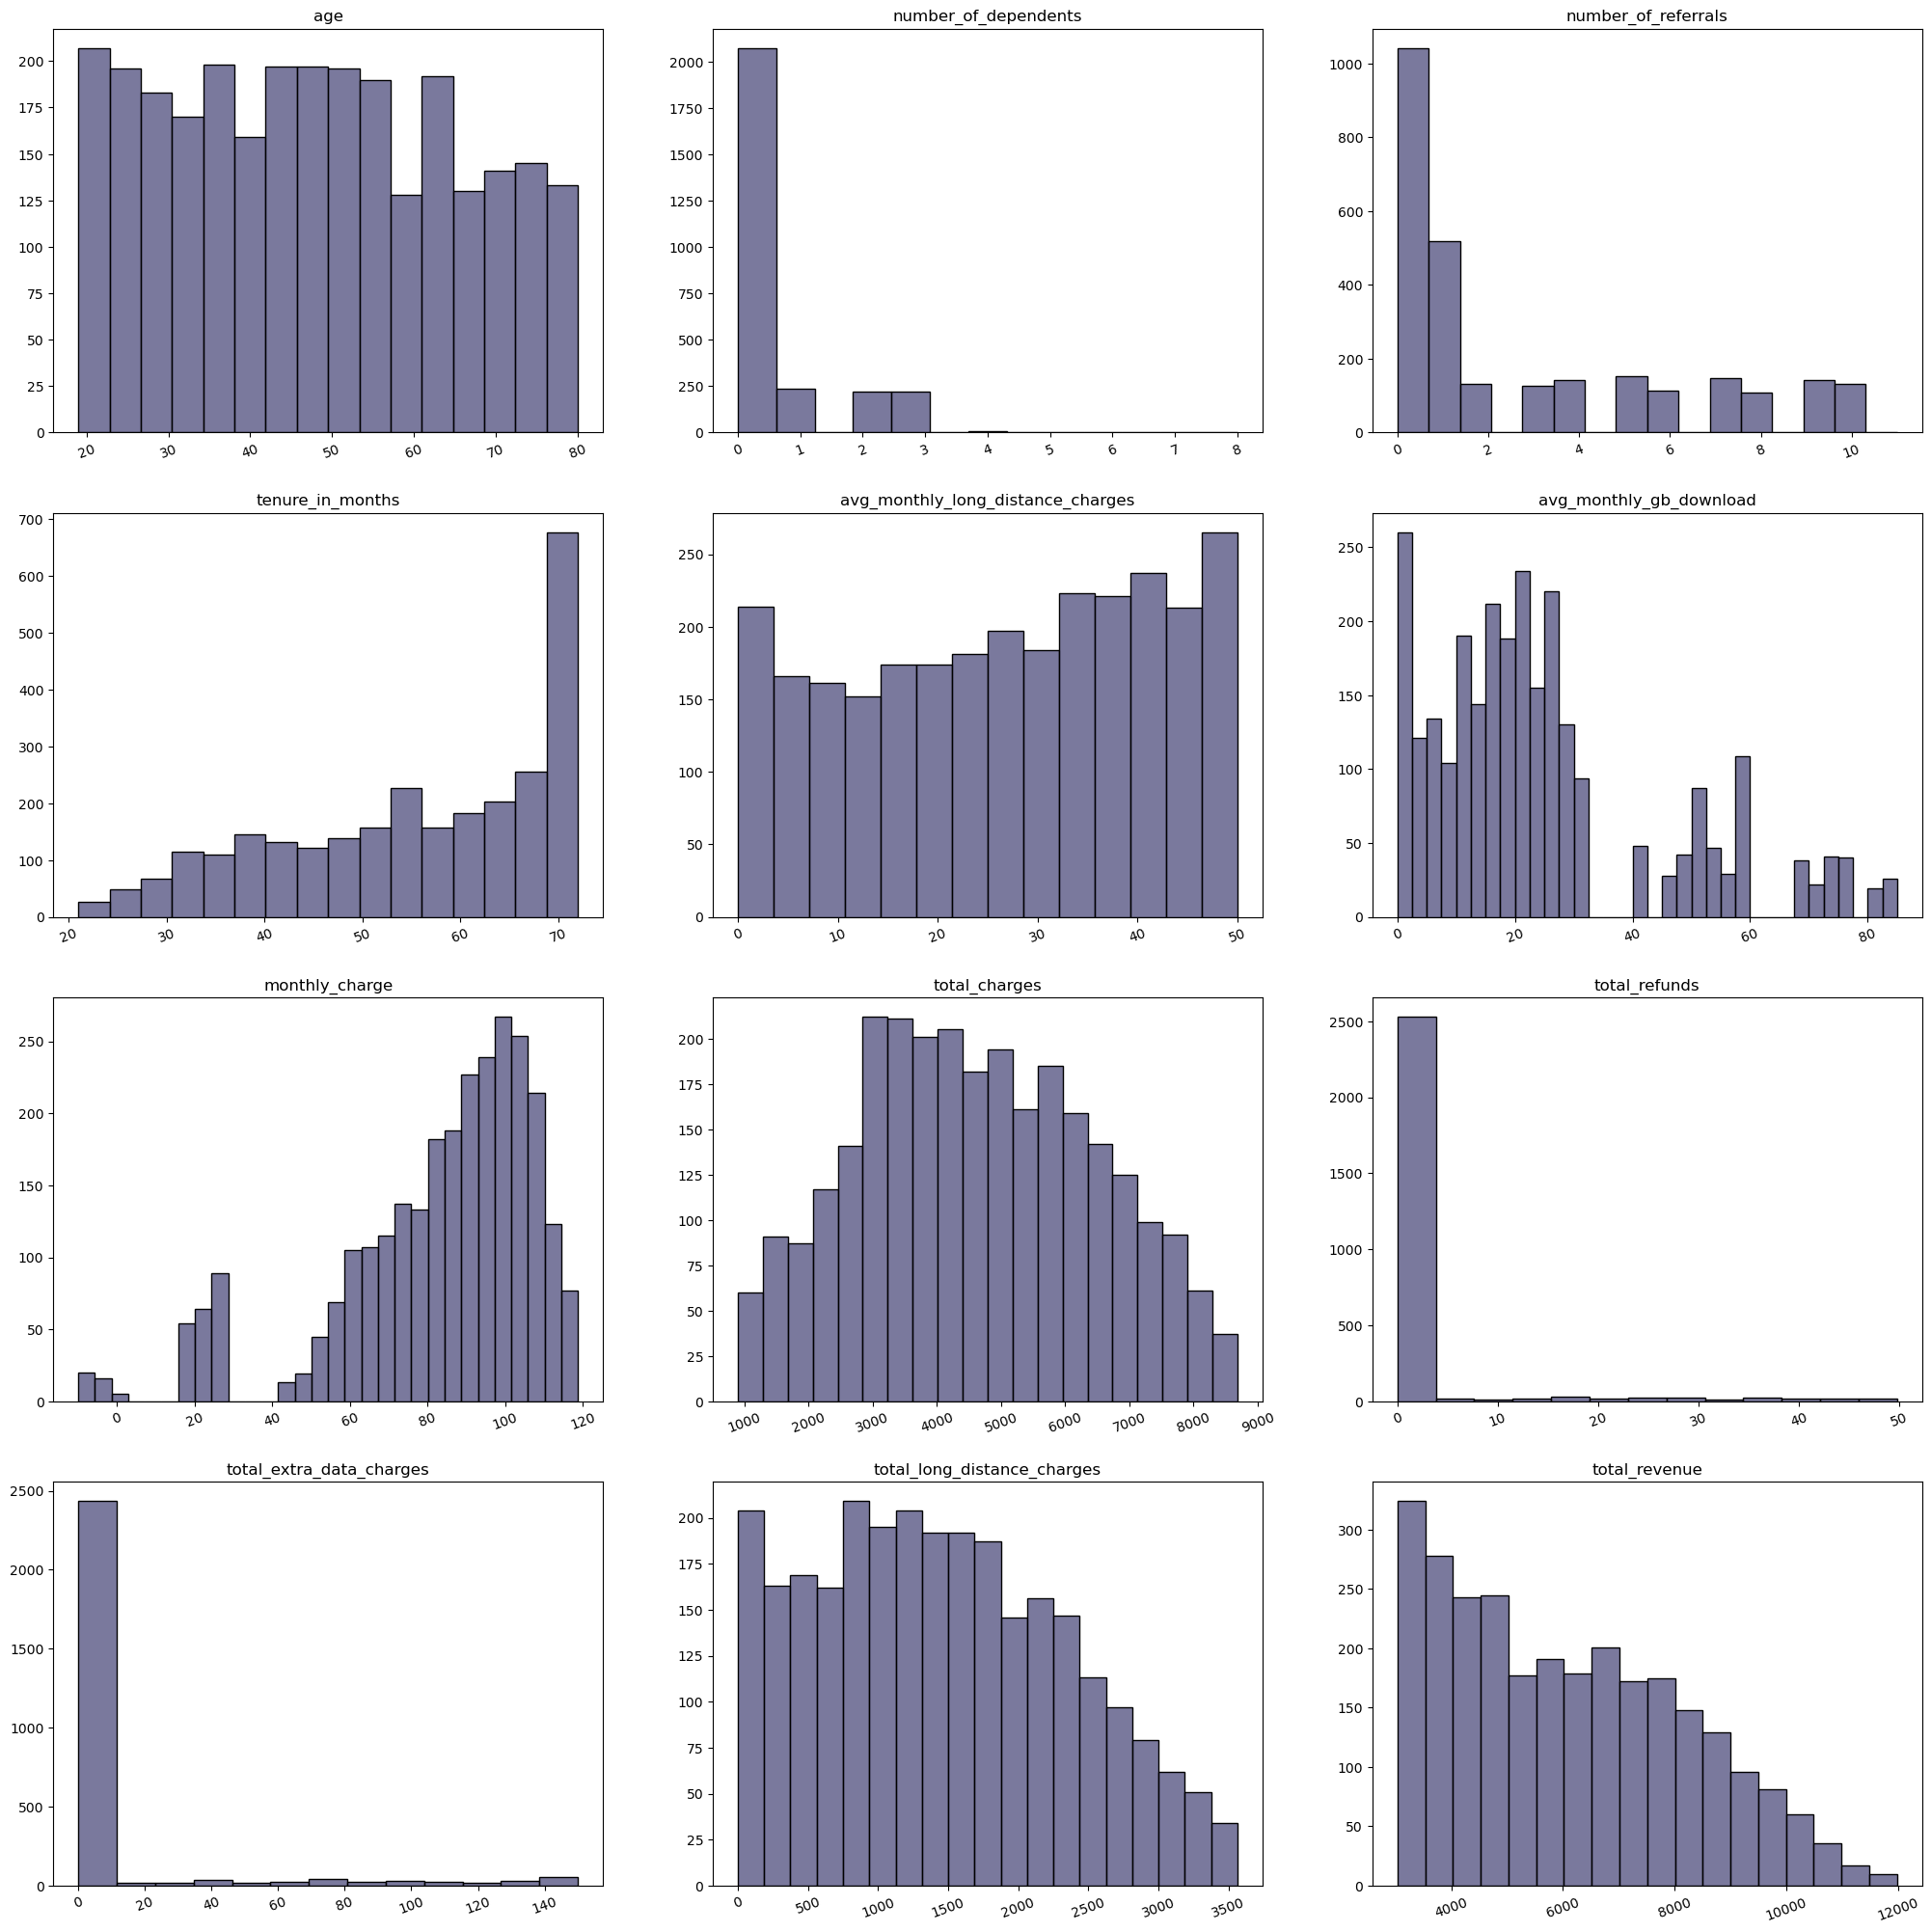

In [33]:
fig = plt.figure(figsize = (25, 25))

i = 1
for x in num:
    plt.subplot(4, 3, i)
    ax = sns.histplot(x = df_high_value[x], color = '#4D4C7D')
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(x), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

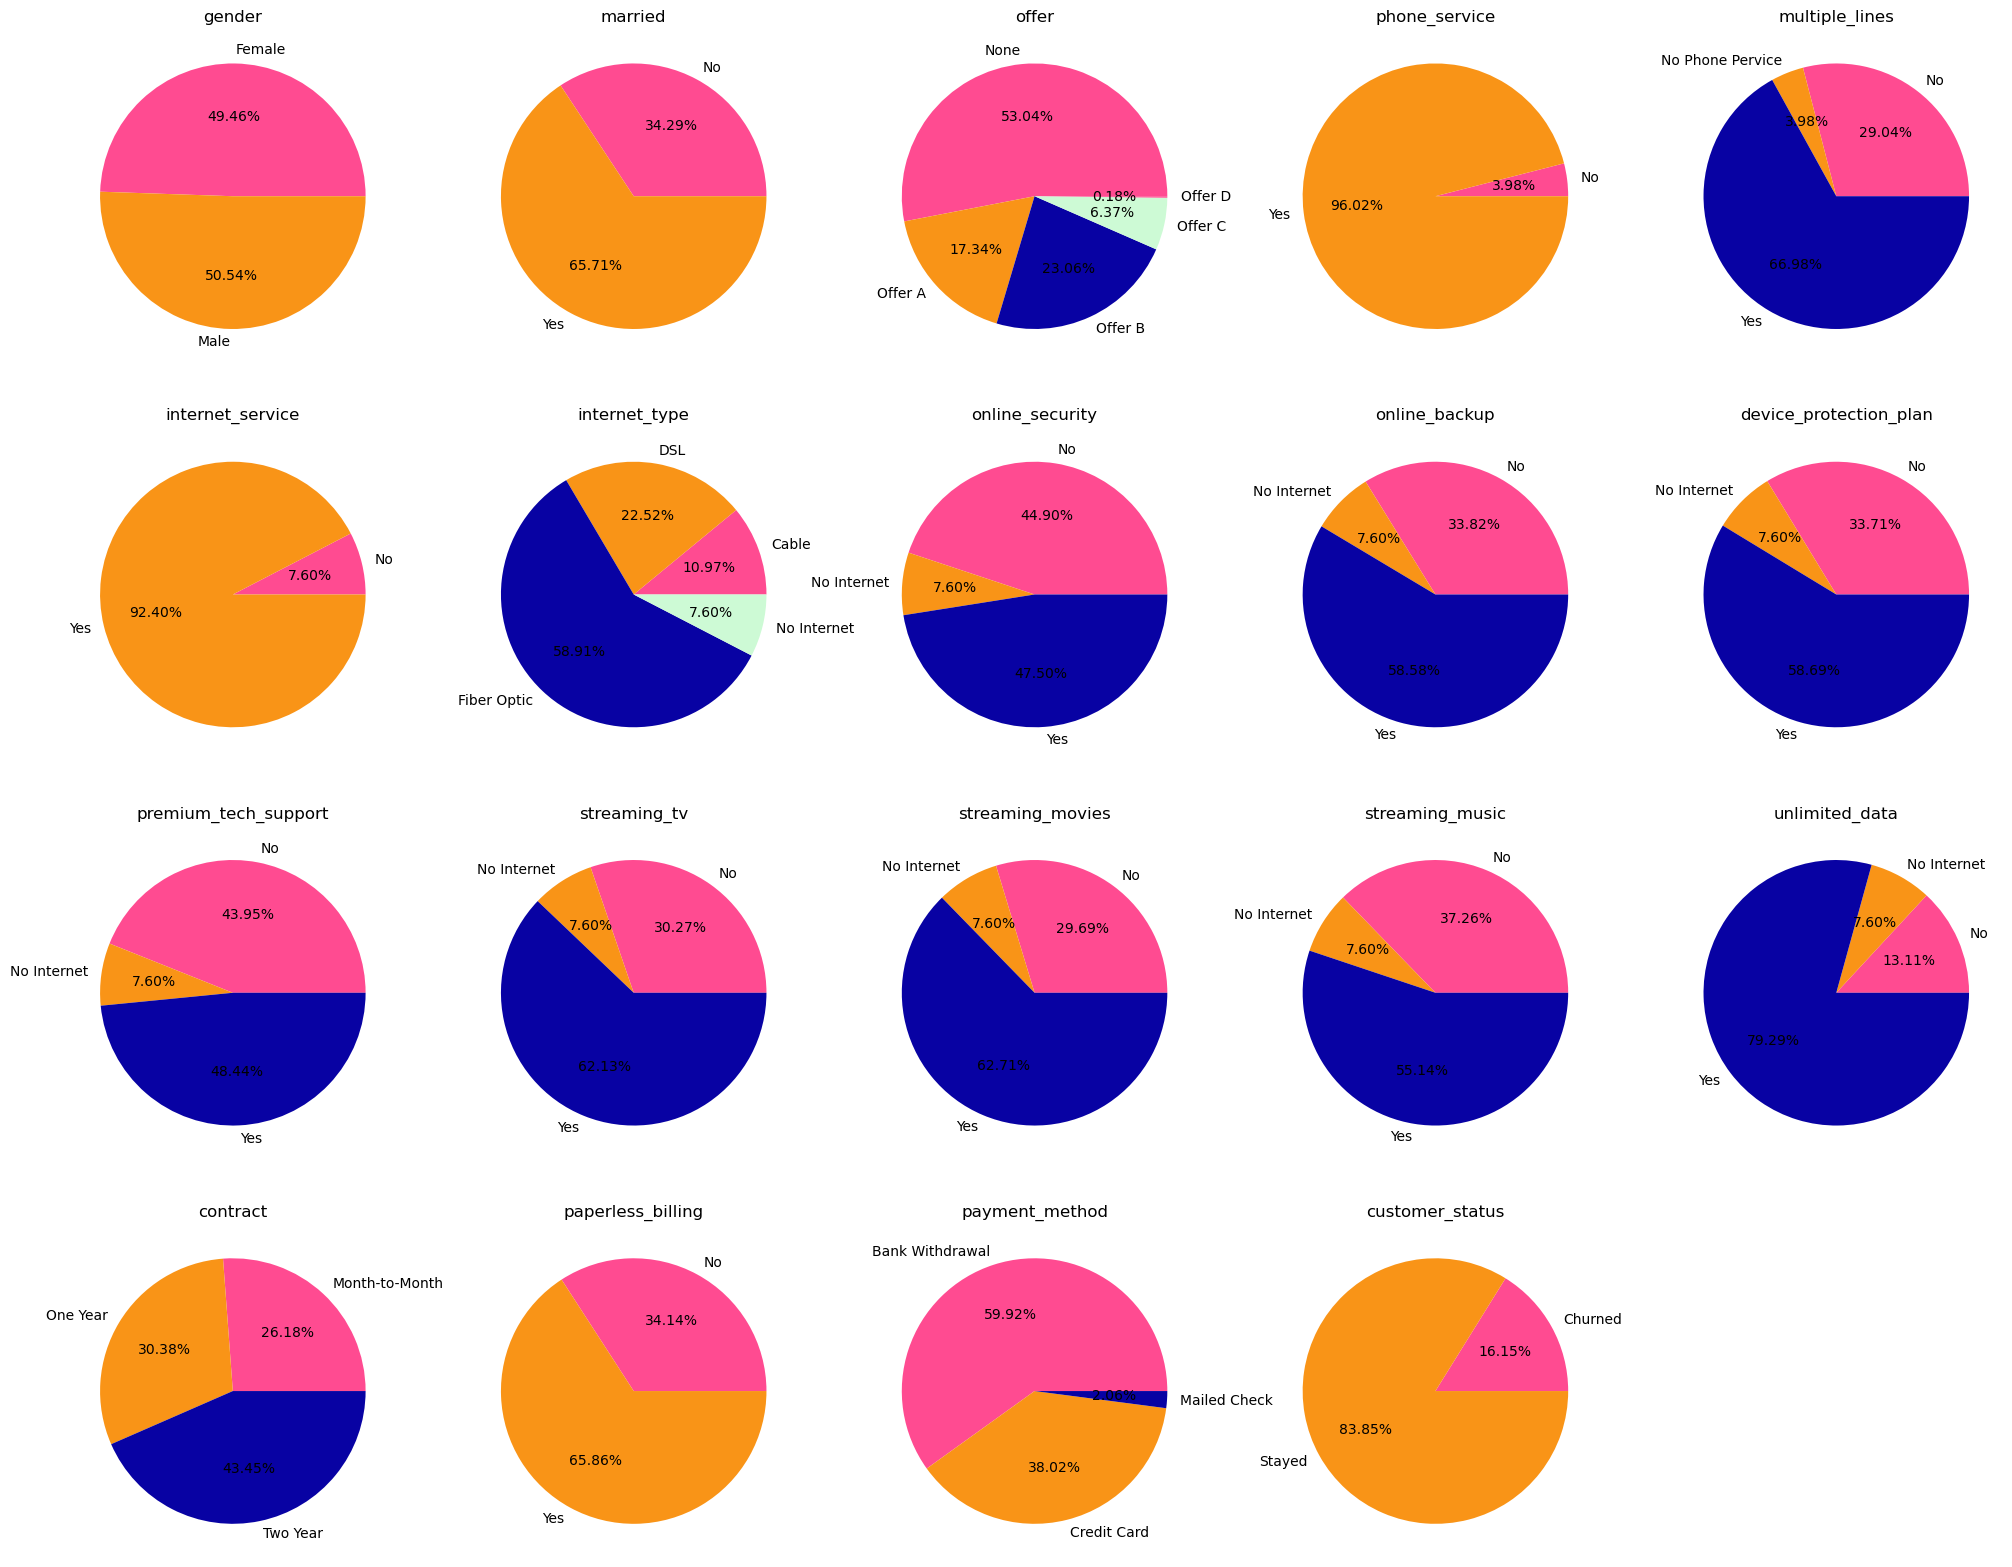

In [34]:
fig = plt.figure(figsize = (25, 25))
i=1
for x in cat:
    plt.subplot(5, 5, i)
    ax = df_high_value.groupby([x]).size().plot(kind = 'pie', autopct = '%.2f%%', colors = ["#FF4B91","#F99417","#0802A3","#CDFAD5"])
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(x), loc='center')
    i+=1
plt.show()

#### **Churn Customers Analysis**

In [35]:
df_churned = df.loc[df['customer_status'] == "Churned"]

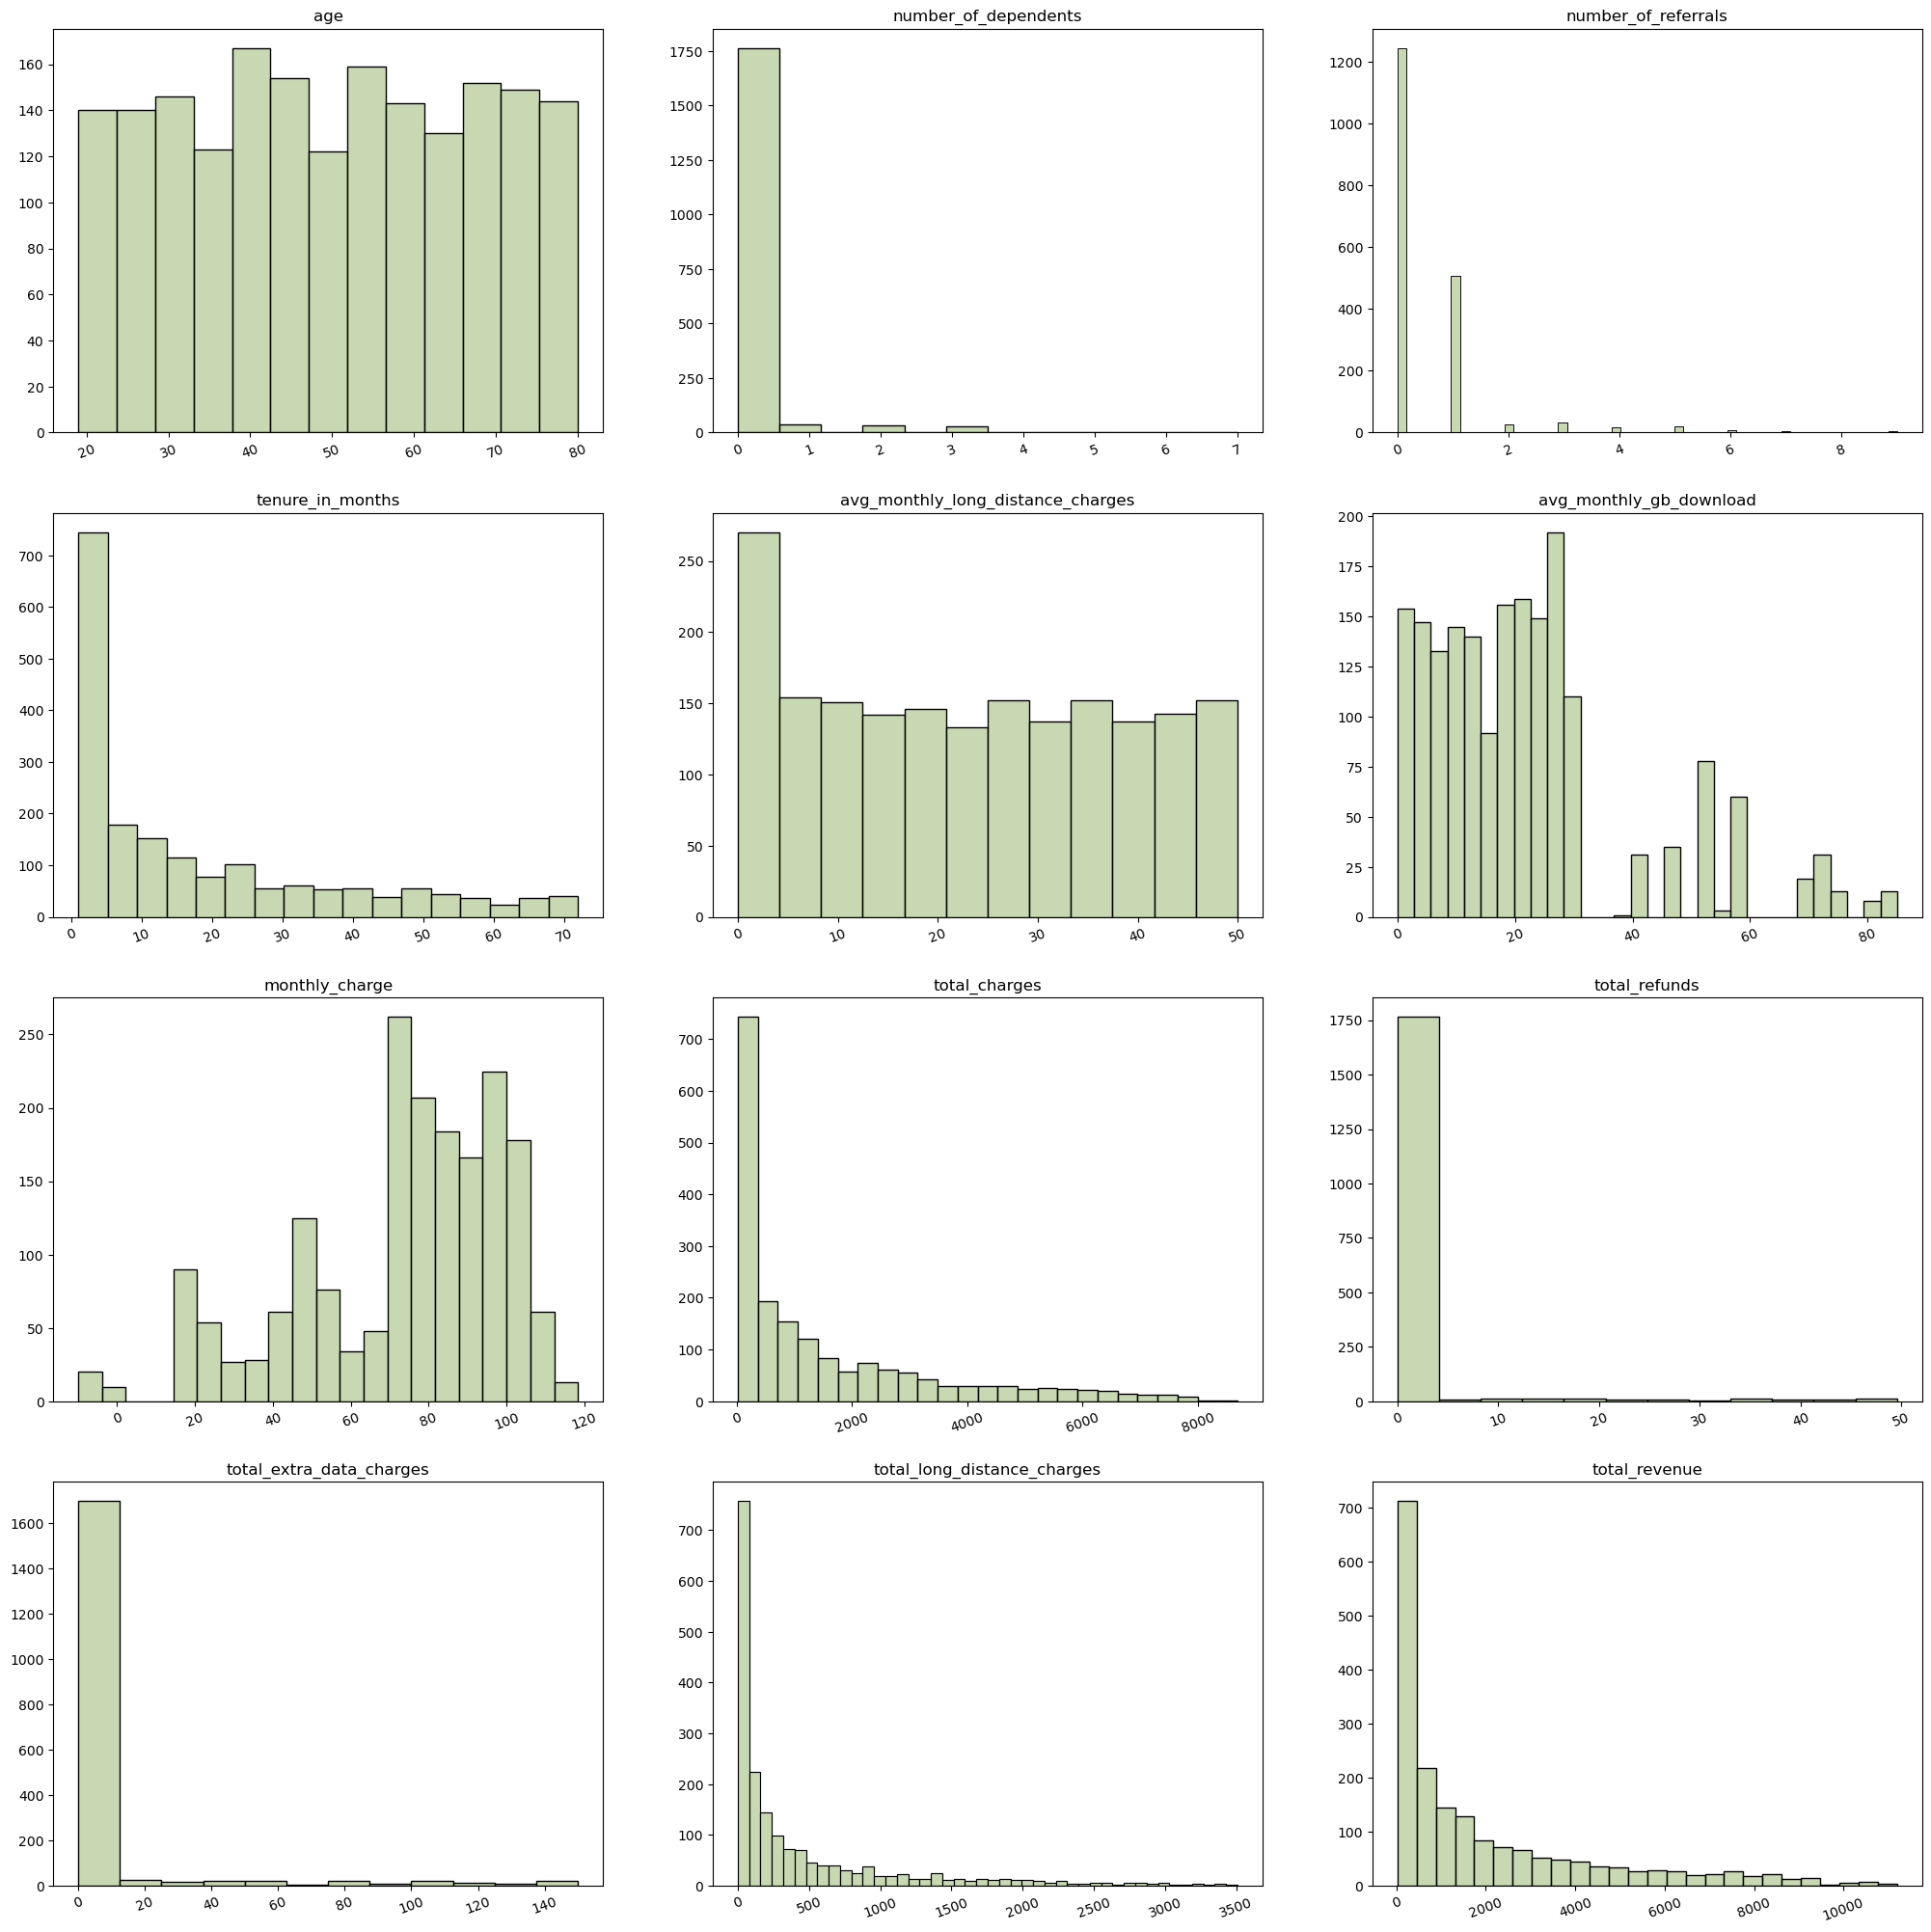

In [36]:
fig = plt.figure(figsize = (25, 25))

i = 1
for x in num:
    plt.subplot(4, 3, i)
    ax = sns.histplot(x = df_churned[x], color = '#B5CB99')
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(x), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

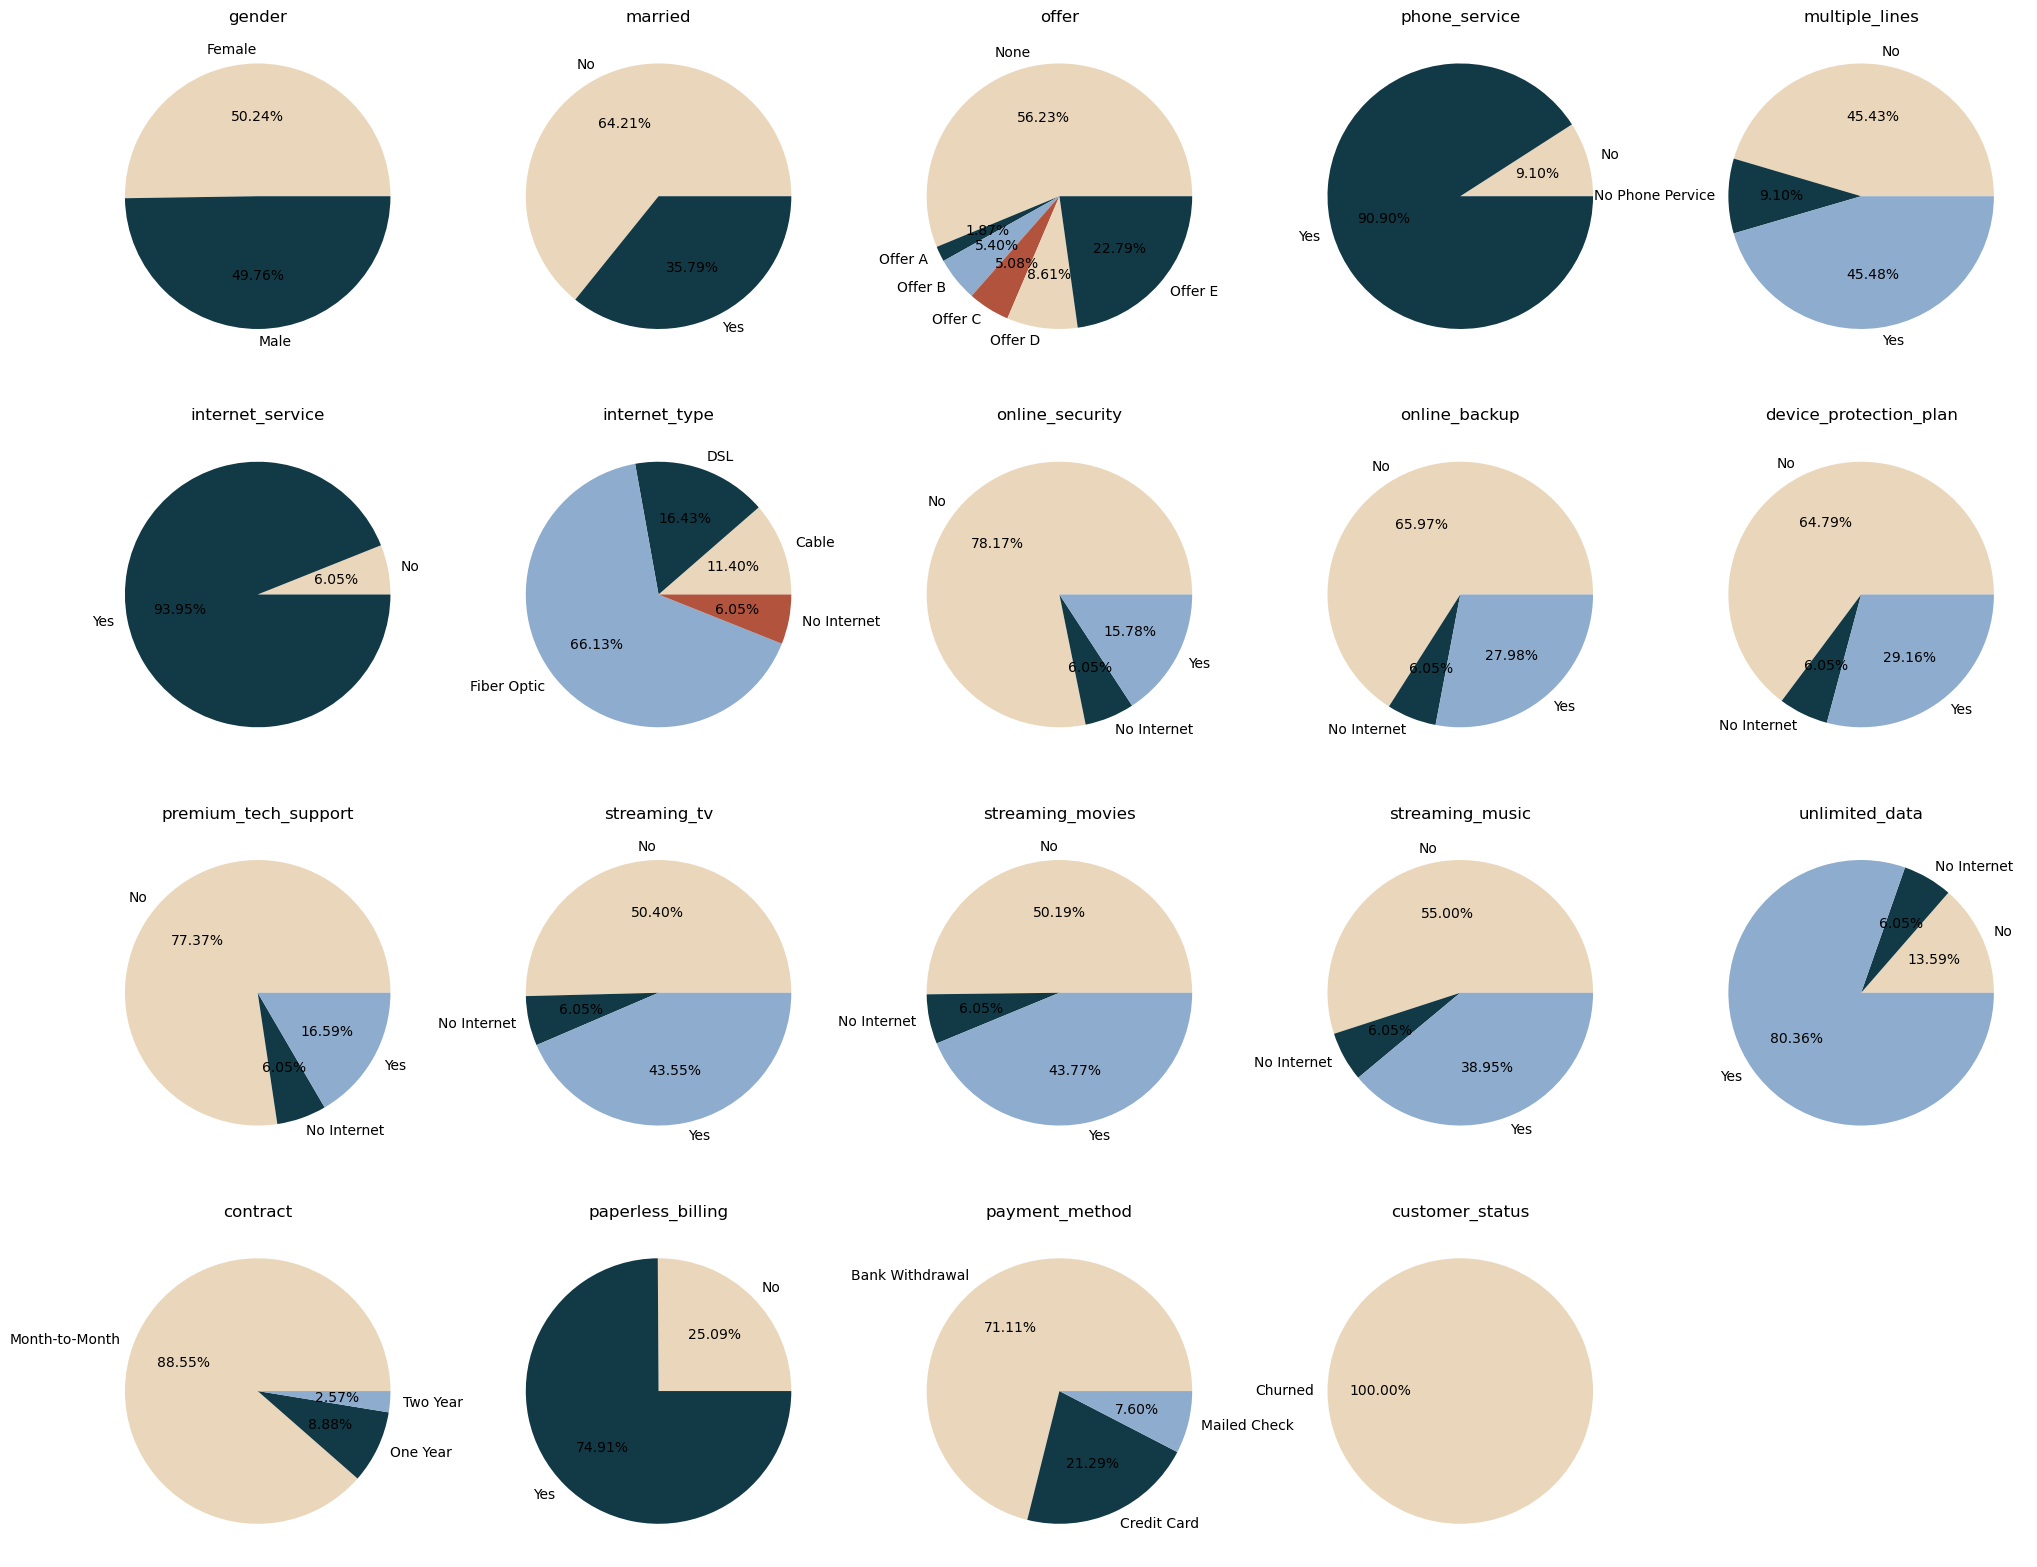

In [37]:
fig = plt.figure(figsize = (25, 25))
i=1
for x in cat:
    plt.subplot(5, 5, i)
    ax = df_churned.groupby([x]).size().plot(kind = 'pie', autopct = '%.2f%%', colors = ["#EAD7BB","#113946","#8EACCD","#B2533E"])
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(x), loc='center')
    i+=1
plt.show()

### Profile Summary of High-Value Customers:

- About 68% of these customers are in a marital relationship.
- None have engaged with Offer E.
- Over half have at least one subscription to internet-related services such as backup, security, and protection plans, as well as entertainment streaming services like TV, movies, and music.
- A substantial 82% are committed to long-term contracts.

### Profile Summary of Churned Customers:

- Roughly 36% of these customers are married.
- Offer E appears to be a strong draw, suggesting a need for the company to reevaluate this particular offer.
- The majority, over 50%, have not subscribed to any additional internet or streaming services.
- A notable 89% prefer a monthly billing arrangement.

### Shared Characteristics:

- Gender distribution is balanced across both customer categories.
- Fiber-optic internet service stands out as the most preferred option for both segments.
- Unlimited data usage is the go-to choice for the majority in both groups.
- A considerable number of customers from both segments prefer paperless billing and opt for bank withdrawal as their payment method.

## Feature Selection

In [38]:
df_num = df_clean.select_dtypes('number')
df_object = df_clean.select_dtypes('object')

Check Correlation of Numerical Columns

In [39]:
# change customer_status into Label and insert to new dataframe
df_object_encoded = df_object.copy()

le = LabelEncoder()
df_object_encoded['customer_status'] = le.fit_transform(df_object_encoded['customer_status'])

CORR COLUMNS (TOP 3):
 
['tenure_in_months', 'number_of_referrals', 'total_revenue']
 
tenure_in_months       0.446411
number_of_referrals    0.312558
total_revenue          0.298829
dtype: float64


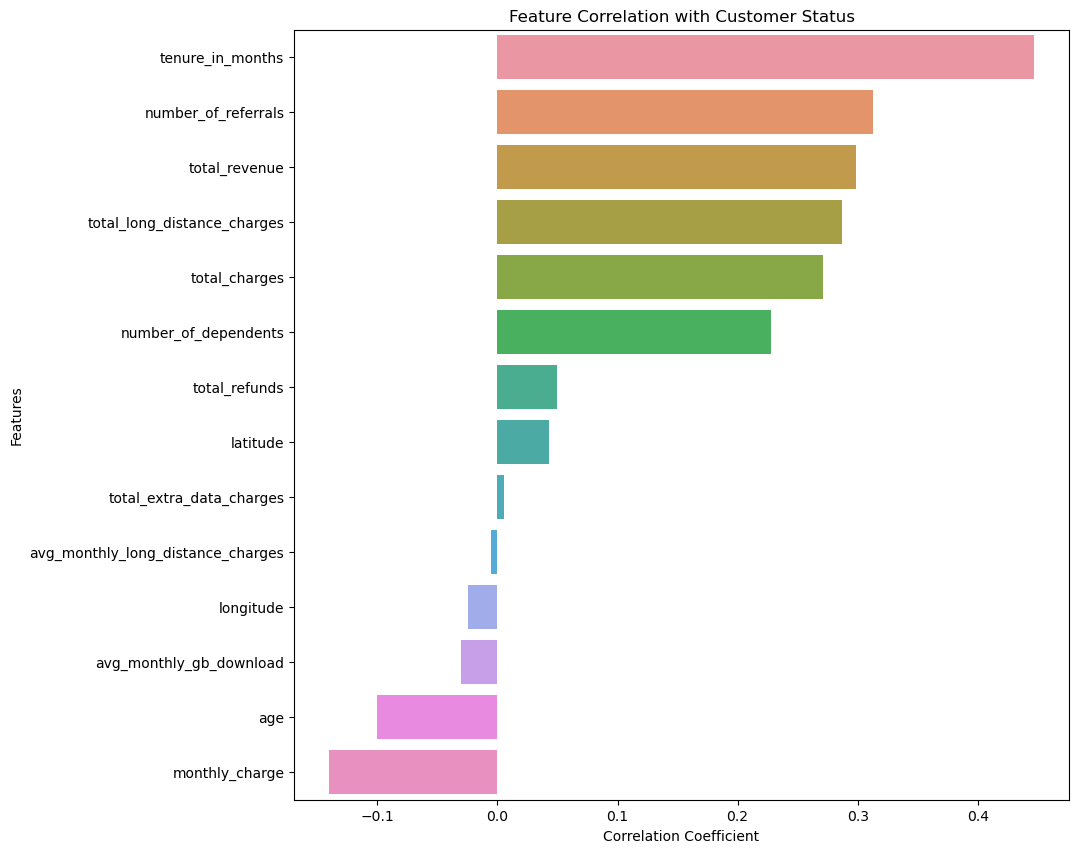

In [40]:
# find top 5 feature with highest colleration to Customer_status

corr = df_num.corrwith(df_object_encoded['customer_status']).sort_values(ascending=False)[:3]
corr2 = df_num.corrwith(df_object_encoded['customer_status']).sort_values(ascending=False)

corr_df = corr.index.tolist()

print('CORR COLUMNS (TOP 3):')
print(' ')
print(corr_df)
print(' ')
print(corr)


# Display the sorted correlations
plt.figure(figsize=(10, 10))
sns.barplot(y=corr2.index, x=corr2.values, orient='h')
plt.title("Feature Correlation with Customer Status")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

Check Chi-Square score of Categorical Columns

In [41]:
# List of categorical columns to check against 'Customer Status'
columns_to_check = ['gender', 'married', 'city', 'offer', 'phone_service', 'multiple_lines', 
 'internet_service', 'internet_type', 'online_security', 'online_backup', 
 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 
 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 
 'paperless_billing', 'payment_method']

# Empty DataFrame to store results
chi2_results = pd.DataFrame(columns=['Variable', 'Chi2 Value', 'p-value'])

# Loop through each categorical variable and calculate the Chi-Square statistic
for column in columns_to_check:
    contingency_table = pd.crosstab(df_object[column], df_object['customer_status'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Append results to DataFrame
    chi2_results = chi2_results.append({'Variable': column, 'Chi2 Value': chi2, 'p-value': p_value}, ignore_index=True)

# Sort the results by p-value
chi2_results.sort_values('p-value', inplace=True)

chi2_results.head(5)

,Variable,Chi2 Value,p-value
16,contract,1987.364679,0.000000e+00
3,offer,1127.266731,6.982367e-236
8,online_security,991.710137,2.234136e-213
11,premium_tech_support,968.573524,2.306375e-208
10,device_protection_plan,750.212023,4.664869e-161


### Features Selected for Modeling

**Numerical Columns:**

- Tenure in Months
- Number of Referrals
- Total Revenue

**Categorical Columns:**

- Contract
- Offer
- Online Security
- Premium Tech Support
- Device Protection Plan

These features encompass both numerical and categorical variables that will be instrumental in building a predictive model. Numerical columns like 'Tenure in Months' and 'Total Revenue' can provide insights into customer loyalty and financial contributions, respectively. On the other hand, categorical variables such as 'Contract' and 'Offer' could reveal customer preferences and their perceived value in the services.